In [1]:
from cognite.client import CogniteClient
from retrieve_data import RetrieveData
from analyze_data import AnalyzeData
from feature_engineer import FeatureEngineer
from est_ttf import EstTTF
import pandas as pd

# Instantiate Cognite SDK client:
client = CogniteClient()

In [2]:
#1. Instantiate a DataRetriever Class.
retriever = RetrieveData(client)

In [3]:
#2. Assign the desired pi tag to a variable
pitag1 = "KASAWARI_PI_PC.SKA.KSCPP.DCS.SW.22PIA-0028.PV"
start_time = "365d-ago"
end_time = "now"
agg = "interpolation"
interval = "1m"




In [4]:
#3. Call out retrieve_data method from the initialized class
df1 = retriever.retrieve_agg(ex_id=pitag1, start_time_str=start_time, end_time_str=end_time, agg=agg, interval=interval)

In [5]:
#4. display top 5 of the dataframe and info
df1.head()

,Timestamp,value
0,2024-07-31 17:06:00,79.193684
1,2024-07-31 17:07:00,79.128995
2,2024-07-31 17:09:00,78.960214
3,2024-07-31 17:11:00,78.808014
4,2024-07-31 17:12:00,78.723471


In [6]:
df1.describe()

,Timestamp,value
count,109951,109951.000000
mean,2024-11-29 08:19:53.459268352,71.625804
min,2024-07-31 17:06:00,-0.665096
25%,2024-09-29 15:26:30,73.042881
50%,2024-11-19 01:21:00,74.407090
75%,2025-01-24 14:29:30,75.614303
max,2025-06-02 08:54:00,89.223432
std,NaN,13.869882


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109951 entries, 0 to 109950
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Timestamp  109951 non-null  datetime64[ns]
 1   value      109951 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 MB


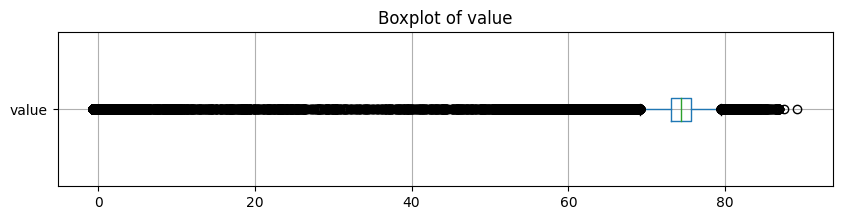

In [8]:
#Plot boxplot to identify outliers
analyzer =AnalyzeData(df1)

#boxplot
analyzer.box_plot()

In [9]:
df1["value"].skew()

-4.66261248560258

In [10]:
#Remove Outliers
analyzer.remove_outliers()

Lower bound: 69.19
Upper bound: 79.47
Removed 8703 outliers.


In [11]:
analyzer.df.describe()

,value
count,101248.000000
mean,74.429675
std,1.746424
min,69.189130
25%,73.310726
50%,74.506185
75%,75.622918
max,79.470253


In [12]:
#Feature engineer statistical columns
cleaned_df = analyzer.df
fe = FeatureEngineer(cleaned_df)

In [13]:
df = fe.generate_all_features()

In [14]:
df = fe.assign_status(low_alarm = 65.8, high_alarm=86)

In [15]:
df.head()

,value,deviation_from_mean,abs_deviation,deviation_mad,abs_dev_mad,sigma_level,slope,rolling_mean_5,rolling_std_5,rolling_mad_5,rolling_slope_5,lag1,lag_diff,status
Timestamp,,,,,,,,,,,,,,
2024-07-31 17:06:00,79.193684,4.764008,4.764008,4.687498,4.687498,2.727864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly
2024-07-31 17:07:00,79.128995,4.699320,4.699320,4.622810,4.622810,2.690824,-0.064689,NaN,NaN,NaN,NaN,79.193684,-0.064689,Anomaly
2024-07-31 17:09:00,78.960214,4.530539,4.530539,4.454029,4.454029,2.594180,-0.168781,NaN,NaN,NaN,NaN,79.128995,-0.168781,Anomaly
2024-07-31 17:11:00,78.808014,4.378339,4.378339,4.301829,4.301829,2.507030,-0.152200,NaN,NaN,NaN,NaN,78.960214,-0.152200,Anomaly
2024-07-31 17:12:00,78.723471,4.293795,4.293795,4.217285,4.217285,2.458621,-0.084543,78.962875,0.201353,0.168781,-0.126141,78.808014,-0.084543,Anomaly


In [16]:
df.describe()

,value,deviation_from_mean,abs_deviation,deviation_mad,abs_dev_mad,sigma_level,slope,rolling_mean_5,rolling_std_5,rolling_mad_5,rolling_slope_5,lag1,lag_diff
count,101248.000000,1.012480e+05,101248.000000,101248.000000,101248.000000,101248.000000,101247.000000,101244.000000,101244.000000,101244.000000,101244.000000,101247.000000,101247.000000
mean,74.429675,-7.671346e-15,1.383712,-0.076510,1.382354,0.792312,-0.000019,74.429523,0.302145,0.161220,-0.000014,74.429648,-0.000019
std,1.746424,1.746424e+00,1.065513,1.746424,1.070014,0.610111,0.518211,1.704497,0.298246,0.141634,0.184570,1.746411,0.518211
min,69.189130,-5.240545e+00,0.000028,-5.317055,0.000021,0.000016,-10.129916,69.273186,0.003470,0.000358,-2.608360,69.189130,-10.129916
25%,73.310726,-1.118950e+00,0.545664,-1.195460,0.541772,0.312446,-0.126814,73.337939,0.160194,0.090217,-0.106246,73.310711,-0.126814
50%,74.506185,7.651020e-02,1.155525,0.000000,1.153062,0.661652,0.062412,74.517033,0.216907,0.129603,0.033477,74.506165,0.062412
75%,75.622918,1.193243e+00,1.968425,1.116733,1.961146,1.127117,0.146634,75.604612,0.361194,0.189434,0.113558,75.622902,0.146634
max,79.470253,5.040578e+00,5.240545,4.964067,5.317055,3.000728,8.417102,79.401439,5.022090,4.379968,2.781938,79.470253,8.417102


In [17]:
retriever.save_to_csv(df, "cleaned df with FE, TTF.csv")

Saved to cleaned df with FE, TTF.csv


In [18]:
ttf_modeler = EstTTF(df, high_alarm=86, low_alarm=65.8)

In [19]:
ttf_modeler.estimate_ttf()

,value,deviation_from_mean,abs_deviation,deviation_mad,abs_dev_mad,sigma_level,slope,rolling_mean_5,rolling_std_5,rolling_mad_5,rolling_slope_5,lag1,lag_diff,status,Est_TTF_Hours
Timestamp,,,,,,,,,,,,,,,
2024-07-31 17:06:00,79.193684,4.764008,4.764008,4.687498,4.687498,2.727864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anomaly,None
2024-07-31 17:07:00,79.128995,4.699320,4.699320,4.622810,4.622810,2.690824,-0.064689,NaN,NaN,NaN,NaN,79.193684,-0.064689,Anomaly,None
2024-07-31 17:09:00,78.960214,4.530539,4.530539,4.454029,4.454029,2.594180,-0.168781,NaN,NaN,NaN,NaN,79.128995,-0.168781,Anomaly,None
2024-07-31 17:11:00,78.808014,4.378339,4.378339,4.301829,4.301829,2.507030,-0.152200,NaN,NaN,NaN,NaN,78.960214,-0.152200,Anomaly,None
2024-07-31 17:12:00,78.723471,4.293795,4.293795,4.217285,4.217285,2.458621,-0.084543,78.962875,0.201353,0.168781,-0.126141,78.808014,-0.084543,Anomaly,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-02 08:27:00,77.699655,3.269980,3.269980,3.193470,3.193470,1.872386,0.094541,77.558668,0.114702,0.099829,0.039762,77.605114,0.094541,Normal,None
2025-06-02 08:44:00,78.399395,3.969720,3.969720,3.893210,3.893210,2.273056,0.699740,77.718582,0.396829,0.123521,0.220255,77.699655,0.699740,Anomaly,0.01
2025-06-02 08:51:00,77.588980,3.159305,3.159305,3.082794,3.082794,1.809013,-0.810415,77.754947,0.368473,0.094541,0.100906,78.399395,-0.810415,Normal,None


In [21]:
retriever.save_to_csv(ttf_modeler.df, "dataset with TTF.csv")

Saved to dataset with TTF.csv
